In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

##### RGB to rg chromaticity space comperision

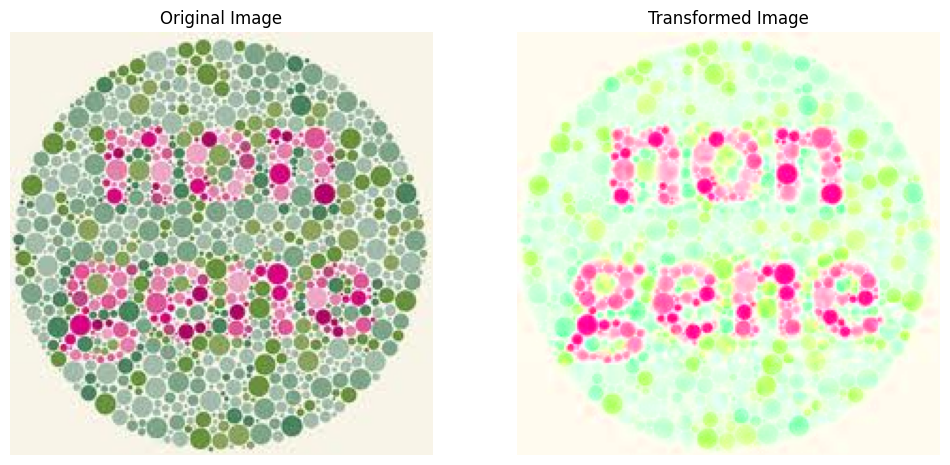

In [4]:
def rgb2rg(image):
    image = image.astype(np.float32)
    sum_rgb = np.sum(image, axis=2, keepdims=True)
    sum_rgb[sum_rgb == 0] = 1
    r = image[:, :, 0] / sum_rgb[:, :, 0]
    g = image[:, :, 1] / sum_rgb[:, :, 0]
    return r, g

def rg2rgb(r, g):
    b = 1 - (r + g)
    alpha = 255 / np.maximum(np.maximum(r, g), b)

    r_out = np.round(alpha * r).astype(np.uint8)
    g_out = np.round(alpha * g).astype(np.uint8)
    b_out = np.round(alpha * b).astype(np.uint8)

    transformed_image = np.stack([r_out, g_out, b_out], axis=-1)
    # Save the transformed image
    image_path = 'Transformed_GMMSegmentTestImage.jpg'
    cv2.imwrite(image_path, transformed_image)
    return transformed_image

def display_images(original, transformed):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(transformed, cv2.COLOR_BGR2RGB))
    plt.title("Transformed Image")
    plt.axis("off")

    plt.show()


image = cv2.imread('GMMSegmentTestImage.jpg')
# Convert the image to rg chromaticity space
r, g = rgb2rg(image)

# Convert back to an 8-bit RGB image
transformed_image = rg2rgb(r, g)

# Display the original and transformed images
display_images(image, transformed_image)